# Ex. 10.1 - Simulated Annealing

In questo esercizio è stato risolto il problema del commesso viaggiatore, risolto nel precedente esercizio con un algoritmo genetico, attraverso un altro metodo di ottimizzazione metaeuristico, il simulated annealing. Nel simulated annealing, in analogia con la termodinamica, la funzione di costo $L(X)$ associata ad una possibile soluzione $X$ del problema (in questo caso una sequenza di città) viene interpretata come l'energia di un microstato fisico di un sistema canonico. Il sistema può quindi essere simulato campionando la distribuzione di Boltzmann $p(X)\sim e^{-\beta L(X)}$ e attendendo che venga raggiunto l'equilibrio termodinamico, in cui $L$ fluttua attorno al suo valor medio $\langle L\rangle$, che dipende dalla temperatura $\beta$ impostata. Diminuendo la temperatura $T$ (aumentando $\beta$), ci si aspetta che $\langle L\rangle$ diminuisca fino a raggiungere il minimo a temperatura nulla. 

Per realizzare il simulated annealing si è quindi deciso di realizzare simulazioni Monte Carlo per $1000$ temperature diverse, a cominciare da $T=\infty$ ($\beta=0$) per giungere, in passi $\delta\beta=0.5$ fino a temperature molto basse. Ciascuna simulazione è stata condotta con $100$ passi dell'algoritmo Metropolis a partire dalla configurazione finale della simulazione precedente e per realizzare le mosse sono state utilizzate le funzioni - già utilizzate nell'algoritmo genetico - di scambio tra due città (pair permutation), scambio tra due gruppi di città (group permutation), shift di un gruppo di città, inversione dell'ordine delle città in un gruppo. Ciascuna mossa è stata scelta con probabilità del $25\%$. 

Di seguito sono mostrati i grafici della fitness della configurazione finale di ciascuna simulazione in funzione dell'inverso della temperatura per due disposizioni diverse di 30 città:

- disposizione casuale sulla circonferenza di raggio unitario
- disposizione casuale nel quadrato di lato $[0,1)x[0,1)$

Infine si riportano i plot dei cammini più brevi trovati con il simulated annealing.

## Mappa delle città

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

def CircleUp(x):
    return np.sqrt(1-x*x)
def CircleDown(x):
    return -np.sqrt(1-x*x)

f = plt.figure(figsize = (13,6))

x1,y1 = np.loadtxt('circle.start',usecols = (0,1), delimiter = ' ', unpack = 'true')
x2,y2 = np.loadtxt('square.start',usecols = (0,1), delimiter = ' ', unpack = 'true')

f.add_subplot(1, 2, 1)
x_c = np.linspace(-1,1,400)
plt.plot(x1,y1,'o')
plt.plot(x_c,CircleUp(x_c),color = 'green')
plt.plot(x_c,CircleDown(x_c),color='green')
plt.title('città: disposizione random su circonferenza unitaria', size ='13')
plt.xlabel('x')
plt.ylabel('y')

f.add_subplot(1, 2, 2)
x_s = [0,0,1,1,0]
y_s = [0,1,1,0,0]
plt.plot(x2,y2,'o')
plt.plot(x_s,y_s,'-')
plt.title('città: disposizione random nel quadrato [0,1)x[0,1)', size ='13')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

<Figure size 1300x600 with 2 Axes>

## Fitness

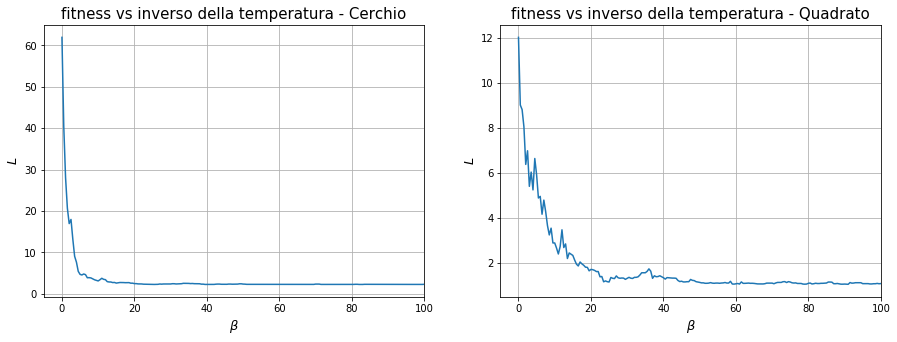

fitness del percorso migliore - Cerchio:  2.247
fitness del percorso migliore - Quadrato:  1.031


In [2]:
# fitness della configurazione finale in funzione dell'inverso della temperatura

f = plt.figure(figsize = (15,5))
file = ['Circle','Square']
mappa = ['Cerchio','Quadrato']
best_i = []
best_fitness = []

for i in range(2):
    temp,fitness = np.loadtxt(file[i]+"/fitness.dat", usecols=(0,1), unpack='true')
    best_i.append(np.argmin(fitness))
    best_fitness.append(np.min(fitness))

    f.add_subplot(1, 2, i+1)
    plt.plot(temp,fitness)
    plt.xlabel('$\\beta$',size=13)
    plt.ylabel('$L$',size=13)
    plt.xlim(-5,100)
    plt.title('fitness vs inverso della temperatura - '+mappa[i], size = 15)
    plt.grid()
plt.show()

for i in range(2):
    print("fitness del percorso migliore - "+mappa[i]+": ",best_fitness[i])

Nel caso di città disposte sul cerchio, la fitness converge velocemente ad un valore di equilibrio. Il problema delle città nel quadrato richiede il raggiungimento di temperature più basse e l'andamento della fitness presenta maggiori fluttuazioni.

## Plot del percorso più breve


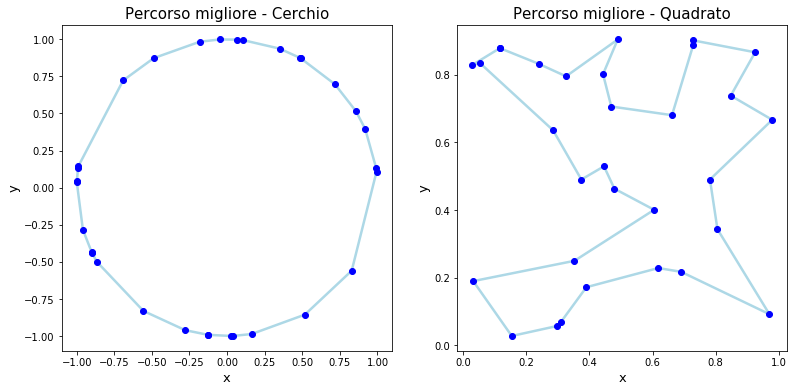

In [4]:
# plot del percorso più breve 
g = plt.figure(figsize = (13,6))

X = [x1,x2]
Y = [y1,y2]

x = np.zeros(31)
y = np.zeros(31)

for i in range(2):
    ID = np.loadtxt(file[i]+'/'+file[i]+'Path.'+str(best_i[i])+'.final',usecols = (0), delimiter = ' ', unpack = 'true')
    ID = np.array(ID, dtype=int)
    
    for j in range(30):
        x[j] = X[i][ID[j]]
        y[j] = Y[i][ID[j]]

    x[30] = X[i][ID[0]]
    y[30] = Y[i][ID[0]]

    g.add_subplot(1,2,i+1)
    plt.plot(x,y,'-',color='lightblue',linewidth=2.5)
    plt.plot(x,y,'o',color='blue')
    plt.xlabel('x',size=13)
    plt.ylabel('y',size=13)
    plt.title('Percorso migliore - '+mappa[i],size=15)
plt.show()